In [8]:
%load_ext autoreload
%autoreload 2

import torch

from data.generation import InjectiveLinearDecoder
from spaces import NSphereSpace
from encoders import construct_mlp_encoder

from simclr.simclr import SimCLR

from visualization_utils.spheres import visualize_spheres_side_by_side
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Training an encoder where we map from Sphere to R^4 injectively and then map back to the sphere

latent_dim = 3
kappa = tau = 10

iterations_default = 2000
batch_default = 6144

sphere = NSphereSpace(latent_dim)

def perform_linear_experiment(data_dimension, iterations=iterations_default, batch=batch_default):
    g = InjectiveLinearDecoder(latent_dim, data_dimension)
    f = construct_mlp_encoder(data_dimension, latent_dim)

    sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
    sample_uniform_fixed = lambda batch: sphere.uniform(batch)
    
    simclr = SimCLR(f, g, sample_pair_fixed, sample_uniform_fixed, tau)

    f = simclr.train(batch, iterations)
    
    return lambda latent: f(g(latent))

In [10]:
# 4 Dimensions

h = perform_linear_experiment(4, iterations=1000)

z = sphere.uniform(1000)
z_enc = h(z)

visualize_spheres_side_by_side(plt, z, z_enc)

Linear control score: 1.0
Permutation control score: 1.0


NameError: name 'kappa' is not defined

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.723367691040039 Samples processed: 1 linear disentanglement: 0.5143724083900452 permutation disentanglement: 0.00047659873962402344
Loss: 8.635319709777832 Samples processed: 251 linear disentanglement: 0.9976436495780945 permutation disentanglement: 0.03527102991938591
Loss: 8.63512134552002 Samples processed: 501 linear disentanglement: 0.9996125102043152 permutation disentanglement: 0.030146399512887
Loss: 8.635115623474121 Samples processed: 751 linear disentanglement: 0.99981689453125 permutation disentanglement: 0.03623135760426521
Loss: 8.635100364685059 Samples processed: 1001 linear disentanglement: 0.9997532963752747 permutation disentanglement: 0.03451867774128914
Loss: 8.63513469696045 Samples processed: 1251 linear disentanglement: 0.9998466372489929 permutation disentanglement: 0.03255917504429817
Loss: 8.634963989257812 Samples processed: 1501 linear disentanglement: 0.9997615814208984 permutation disentang

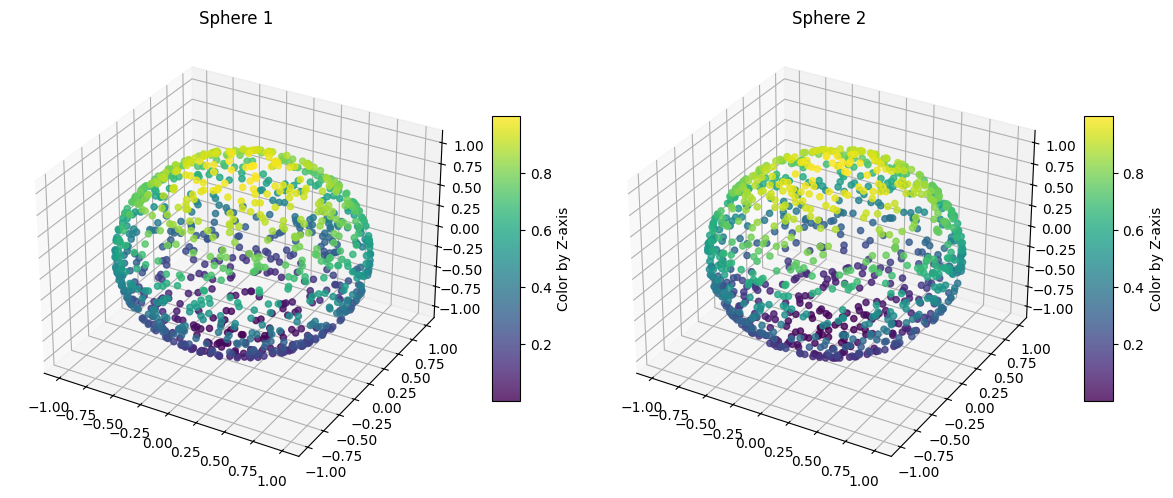

In [31]:
# 5 Dimensions

h = perform_linear_experiment(5, iterations=2500)

z = sphere.uniform(1000)
z_enc = h(z)

visualize_spheres_side_by_side(plt, z, z_enc)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.72327709197998 Samples processed: 1 linear disentanglement: 0.37819018959999084 permutation disentanglement: 0.0021792452316731215
Loss: 8.639023780822754 Samples processed: 251 linear disentanglement: 0.66986083984375 permutation disentanglement: 0.27980276942253113
Loss: 8.634989738464355 Samples processed: 501 linear disentanglement: 0.9998255372047424 permutation disentanglement: 0.21838390827178955
Loss: 8.63512897491455 Samples processed: 751 linear disentanglement: 0.9999087452888489 permutation disentanglement: 0.21521545946598053
Loss: 8.635254859924316 Samples processed: 1001 linear disentanglement: 0.9998642802238464 permutation disentanglement: 0.21308080852031708
Loss: 8.635037422180176 Samples processed: 1251 linear disentanglement: 0.999828040599823 permutation disentanglement: 0.20946966111660004
Loss: 8.635018348693848 Samples processed: 1501 linear disentanglement: 0.999878466129303 permutation disentang

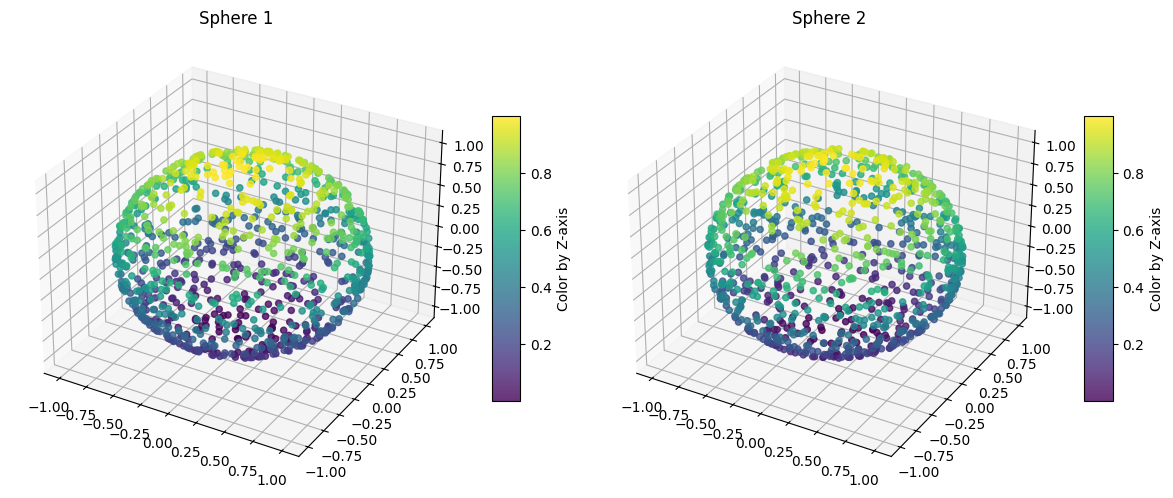

In [29]:
# 6 Dimensions

h = perform_linear_experiment(6, iterations=2500)

z = sphere.uniform(1000)
z_enc = h(z)

visualize_spheres_side_by_side(plt, z, z_enc)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.723368644714355 Samples processed: 1 linear disentanglement: 0.561252772808075 permutation disentanglement: 0.0005576014518737793
Loss: 8.639032363891602 Samples processed: 251 linear disentanglement: 0.7305076718330383 permutation disentanglement: 0.36607685685157776
Loss: 8.635232925415039 Samples processed: 501 linear disentanglement: 0.9997076988220215 permutation disentanglement: 0.2897898852825165
Loss: 8.635320663452148 Samples processed: 751 linear disentanglement: 0.9997429847717285 permutation disentanglement: 0.2926764190196991
Loss: 8.635011672973633 Samples processed: 1001 linear disentanglement: 0.9998834729194641 permutation disentanglement: 0.2879501283168793
Loss: 8.634940147399902 Samples processed: 1251 linear disentanglement: 0.9998376965522766 permutation disentanglement: 0.2881247103214264
Loss: 8.635050773620605 Samples processed: 1501 linear disentanglement: 0.9995077252388 permutation disentanglem

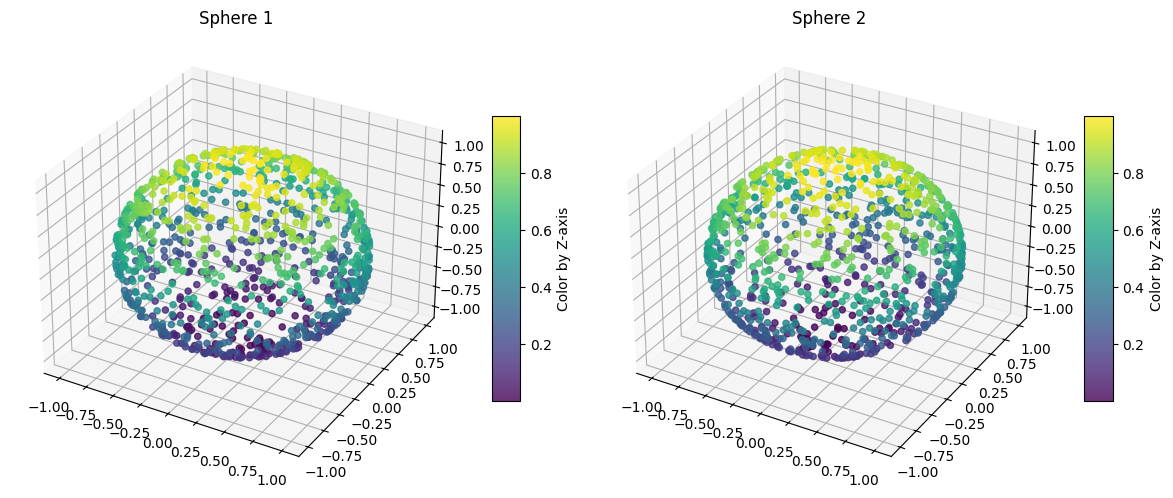

In [30]:
# 7 Dimensions

h = perform_linear_experiment(7, iterations=2500)

z = sphere.uniform(1000)
z_enc = h(z)

visualize_spheres_side_by_side(plt, z, z_enc)